In [87]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import bootstrap
from collections import Counter, defaultdict
import copy
import seaborn as sns
import matplotlib.patches as mpatches
import ast
project_root_dir = "../"

import os
work_dir = os.path.abspath(project_root_dir)

import sys
sys.path.append(project_root_dir)


from src.utils import get_linearization_class

lc = get_linearization_class("fully_expanded")

In [65]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

import matplotlib as mpl
import matplotlib.font_manager as font_manager
import os
#fontpath = os.path.expanduser('~/Downloads/LinLibertine_DRah.ttf')
#prop = font_manager.FontProperties(fname=fontpath)

increase = 8
params = {
    "axes.titlesize" : 18 + increase,
    'axes.labelsize': 18 + increase,
    'font.size': 16 + increase,
    'legend.fontsize': 16 + increase,
    'xtick.labelsize': 12 + increase,
    'ytick.labelsize': 12 + increase,
    #'font.family': prop.get_name(),
}

mpl.rcParams.update(params)

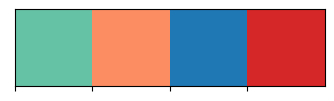

In [117]:
color_palette = {
    'code': "#66c2a5",
    'text': "#fc8d62",
    'rebel': "tab:blue",
    'model': "tab:red"
}
sns.palplot(color_palette.values())

# Task 1

## Precision


In [67]:
def calculate_ci(scores, ci=0.95):
    res = bootstrap(scores, statistic=np.mean, confidence_level=ci, random_state=123)
    return res.confidence_interval

def calculate_exhaustiveness(results_df):
    gt_len = results_df["triplet_set"].apply(lambda x: len(ast.literal_eval(x)))
    res_len = results_df["Result_ex"].apply(lambda x: len(ast.literal_eval(x)))
    perc = 1.0 * res_len / gt_len
    mean = np.mean(perc)
    ci = calculate_ci((perc,))
    return mean, list(ci)
    

In [81]:
df = pd.read_csv("human_eval_data/exhaustiveness_mturk_results.csv")
df_code = df[df['dataset'] == 'model_code']
df_text = df[df['dataset'] == 'model_text']
df_rebel = df[df['dataset'] == 'rebel']

code_ex, ci_code = calculate_exhaustiveness(df_code)
text_ex, ci_text = calculate_exhaustiveness(df_text)
rebel_ex, ci_rebel = calculate_exhaustiveness(df_rebel)

In [82]:
print(code_ex)
print(ci_code)

print(text_ex)
print(ci_text)

print(rebel_ex)
print(ci_rebel)

0.8368217054263566
[0.7635658914728681, 0.8993346998944433]
0.8813953488372093
[0.7841491573988744, 0.9395348837209302]
0.6724806201550387
[0.5581395348837209, 0.7695533433848825]


## Task 1 recall upper bound

In [83]:
df = pd.read_csv("human_eval_data/SynthIE_task1_recall.csv")

In [84]:
df.head()

,id,dataset,triplets_formatted,sentence,Martin,maxime revised,Marija - revised,Maxime,Marija
0,1145,rebel,"(Stacey Bridges; place of birth; Waco, Texas),...","Stacey Bridges (born April 23, 1988 in Waco, T...","Stacey Bridges; date of birth; April 23, 1988\...",Waco; located in the administrative territoria...,NaN,NaN,NaN
1,93578,rebel,"(China; ethnic group; Han Chinese), \n(Chinese...",British Chinese (also known as Chinese British...,Brithish Chinese; also known as; Chinese Briti...,NaN,NaN,NaN,NaN
2,89153,model_code,(Cripps Corner; located in the administrative ...,Cripps Corner is a hamlet in the civil parish ...,Cripps Corner ; instance of; hamlet (village)\...,NaN,East Syssex; located in; England,NaN,NaN
3,141724,rebel,(Ciudad del Este; country; Paraguay),"Antonio Oddone Sarubbi\"", is a football stadiu...",Antonio Oddone Sarubbi; instance of; football ...,NaN,NaN,NaN,NaN
4,60656,model_code,(Carcase for Hounds; country of origin; Kenya)...,Carcase for Hounds is a 1974 novel by Kenyan a...,Carcase for Hounds; instance-of; novel,NaN,Carcase for Hounds; instance-of; novel,NaN,NaN


In [85]:
df = df[['id','dataset','triplets_formatted', 'sentence', 'Martin']]
df = df.fillna('')
df.head(10)

,id,dataset,triplets_formatted,sentence,Martin
0,1145,rebel,"(Stacey Bridges; place of birth; Waco, Texas),...","Stacey Bridges (born April 23, 1988 in Waco, T...","Stacey Bridges; date of birth; April 23, 1988\..."
1,93578,rebel,"(China; ethnic group; Han Chinese), \n(Chinese...",British Chinese (also known as Chinese British...,Brithish Chinese; also known as; Chinese Briti...
2,89153,model_code,(Cripps Corner; located in the administrative ...,Cripps Corner is a hamlet in the civil parish ...,Cripps Corner ; instance of; hamlet (village)\...
3,141724,rebel,(Ciudad del Este; country; Paraguay),"Antonio Oddone Sarubbi\"", is a football stadiu...",Antonio Oddone Sarubbi; instance of; football ...
4,60656,model_code,(Carcase for Hounds; country of origin; Kenya)...,Carcase for Hounds is a 1974 novel by Kenyan a...,Carcase for Hounds; instance-of; novel
5,10422,model_code,(Samsung Galaxy Xcover 3; operating system; An...,The Samsung Galaxy Xcover 3 is a smartphone ma...,Samsung Galaxy Xcover 3; instance of; Smartphone
6,32067,model_code,(West Virginia Route 869; located in the admin...,West Virginia Route 869 is a state highway in ...,Samsung Galaxy Xcover 3; instance of; Smartphone
7,78554,model_text,(The Einstein Intersection; publication date; ...,"The Einstein Intersection, a science fiction n...",The Einstein Intersection; instance-of; novel
8,137425,model_text,(Matthew Shir; sport; Australian rules footbal...,Matthew Shir is a sportsman who plays Australi...,"Matthew Shir, instance of, sportsman"
9,114563,model_code,(TDECU Stadium; structure replaces; Robertson ...,TDECU Stadium replaced Robertson Stadium.,


In [86]:
def calc_stats(scores):
    mean = np.mean(scores)
    ci = calculate_ci((scores,))
    return mean, ci

In [87]:
df['marked'] = df['triplets_formatted'].apply(lambda x: len(x.split(", ")))
df['missing'] = df['Martin'].apply(lambda x: 0 if len(x)== 0 else len(x.split("\n")))
df['up_bound_recall'] = df.apply(lambda x: 1.0*x['marked']/(x['marked'] + x['missing']), axis=1)

df_code = df[df['dataset'] == 'model_code']
df_text = df[df['dataset'] == 'model_text']
df_rebel = df[df['dataset'] == 'rebel']
df_code.head()

mean_code, ci_code_rec = calc_stats(df_code['up_bound_recall'])
mean_text, ci_text_rec = calc_stats(df_text['up_bound_recall'])
mean_rebel, ci_rebel_rec = calc_stats(df_rebel['up_bound_recall'])


In [88]:
print("Code", mean_code, ci_code_rec)
print("Text", mean_text, ci_text_rec)
print("Rebel", mean_rebel, ci_rebel_rec)

Code 0.8170287077263821 ConfidenceInterval(low=0.7437728937728938, high=0.8790697674418604)
Text 0.9325581395348838 ConfidenceInterval(low=0.8693798449612403, high=0.9670542635658914)
Rebel 0.519859726836471 ConfidenceInterval(low=0.4448926115089886, high=0.5977265739787794)


## Plotting task 1

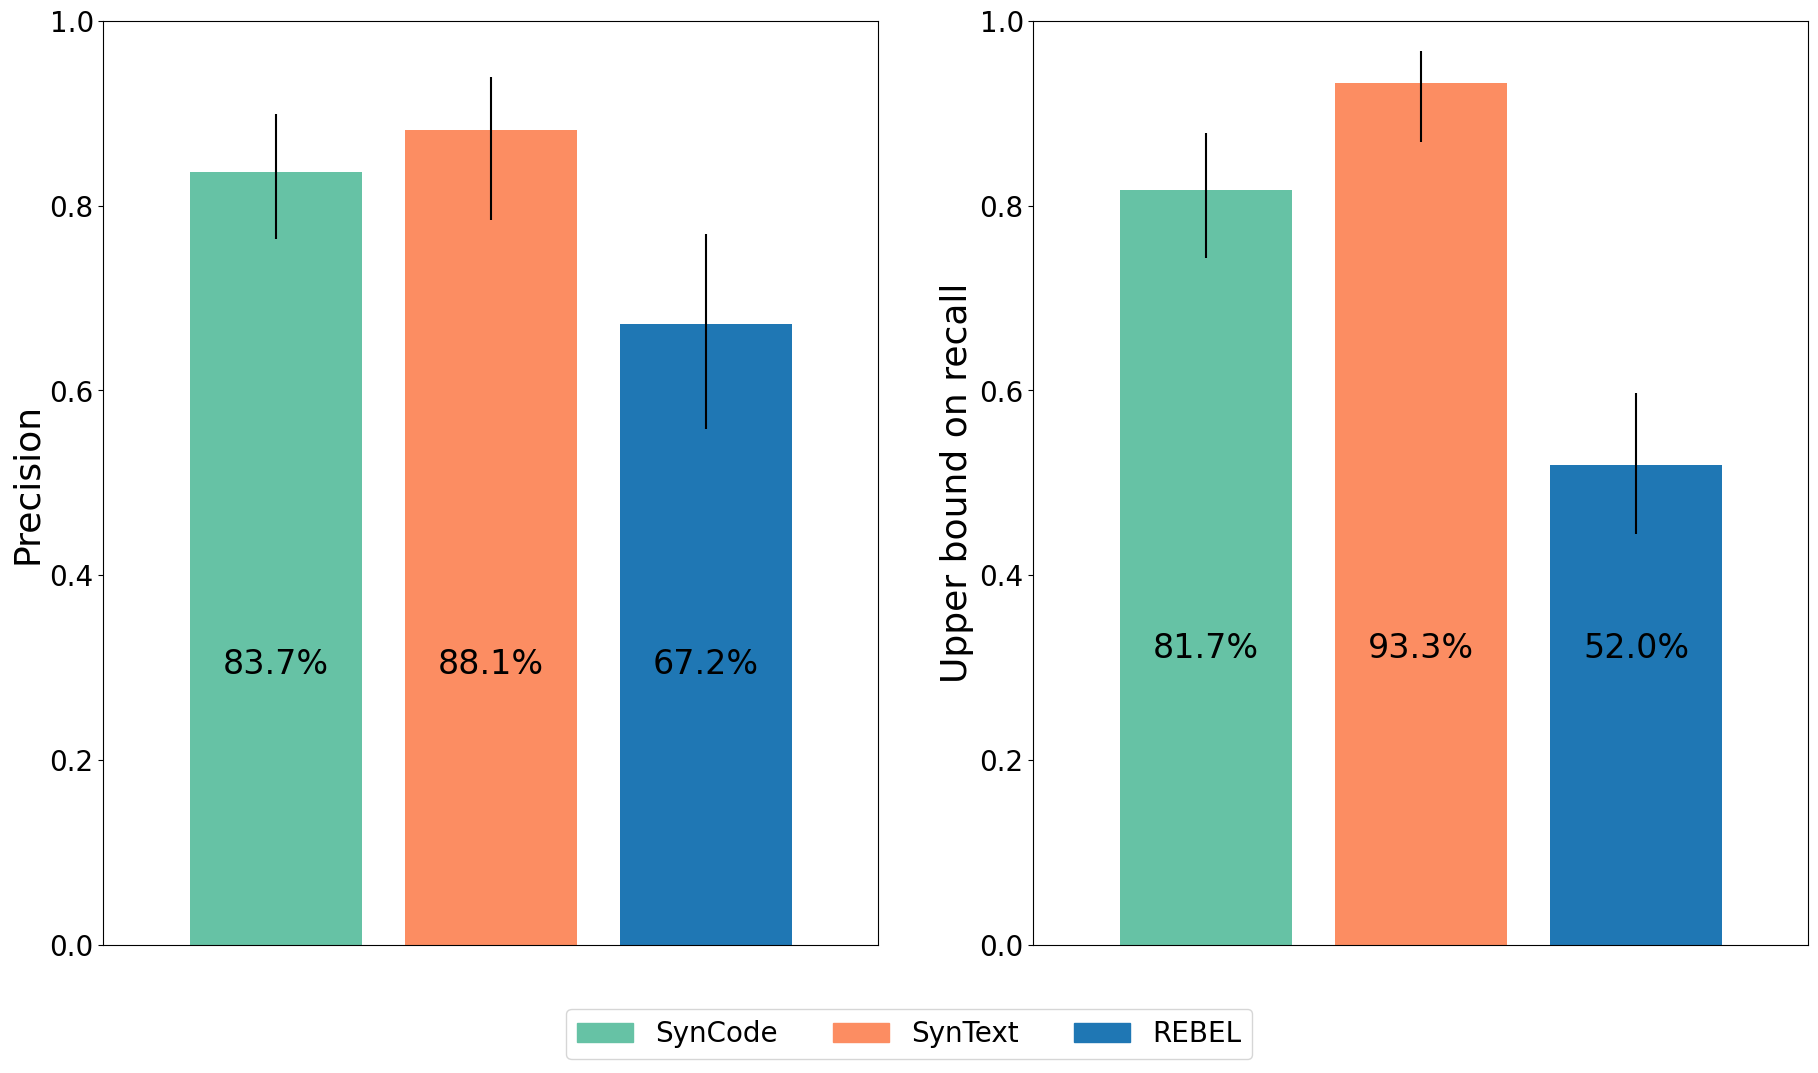

In [113]:
def bar_plot(ax, code_ex, text_ex, rebel_ex, ci_code, ci_text, ci_rebel):
    ci_code = np.abs(code_ex - np.array(ci_code))
    ci_text = np.abs(text_ex - np.array(ci_text))
    ci_rebel = np.abs(rebel_ex - np.array(ci_rebel))
    colors = [color_palette['code'], color_palette['text'], color_palette['rebel']]
    x = [0.1, 0.225, 0.35]
    ys = [code_ex, text_ex, rebel_ex]
    y_errs = np.array([ci_code, ci_text, ci_rebel]).transpose()
    ax.bar(x, ys, yerr=y_errs, width=0.1, color=colors)

    for i in range(len(ys)):
        ax.text(x[i], ys[1]/3, f"{ys[i]*100:.1f}%", ha='center')

    ax.set_ylim((0, 1))
    ax.set_xlim((0, 0.45))
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    

fig, axes = plt.subplots(1, 2, figsize=(22,12))
bar_plot(axes[0], code_ex, text_ex, rebel_ex, ci_code, ci_text, ci_rebel)
axes[0].set_ylabel("Precision")

bar_plot(axes[1], mean_code, mean_text, mean_rebel, ci_code_rec, ci_text_rec, ci_rebel_rec)
axes[1].set_ylabel("Upper bound on recall")

patchlist = []
patchlist.append(mpatches.Patch(color=color_palette['code'], label="SynCode"))
patchlist.append(mpatches.Patch(color=color_palette['text'], label="SynText"))
patchlist.append(mpatches.Patch(color=color_palette['rebel'], label="REBEL"))
fig.legend(handles=patchlist, fontsize='small', loc='lower center', ncol=3)

plt.savefig("human_eval_images/human_eval_task1_plot.pdf", bbox_inches="tight")


# Task 2

## Relative recall

In [124]:
def extract_triplets(triplet_set, indices, sep=", "):
    original_triplets = triplet_set.split(sep)
    extracted_triplets = []
    for idx in indices:
        extracted_triplets.append(original_triplets[int(idx)])
    return extracted_triplets


def calculate_relative_recall(results_df):
    res_dict_ground = {}
    res_dict = {}
    predicted_triplets = []
    for row in results_df.iterrows():
        row = row[1]
        if row['id'] not in res_dict_ground:
            res_dict_ground[row['id']] = set()
        triplets = extract_triplets(row['triplets_formatted'], ast.literal_eval(row['Result_ex']))
        predicted_triplets.append(triplets)
        res_dict_ground[row['id']].update(triplets)
    results_df['predicted_triplets'] = predicted_triplets    
    for key, val in res_dict_ground.items():
        res_dict[key] = len(list(val))
        
    relative_recall = []
    estimated_ground_truth = []
    for row in results_df.iterrows():
        row = row[1]
        if res_dict[row['id']] != 0:
            relative_recall.append(1.0*len(ast.literal_eval(row['Result_ex']))/res_dict[row['id']])
        else:
            relative_recall.append(0)
        estimated_ground_truth.append(res_dict_ground[row['id']])
    results_df['relative_recall'] = relative_recall
    results_df['estimated_gt'] = estimated_ground_truth

    model_scores = results_df[results_df['dataset'] == 'model']['relative_recall']
    rebel_scores = results_df[results_df['dataset'] == 'rebel']['relative_recall']

    model_mean = np.mean(model_scores)
    rebel_mean = np.mean(rebel_scores)

    model_ci = calculate_ci((model_scores,))
    rebel_ci = calculate_ci((rebel_scores,))

    print("Model")
    print(model_mean)
    print(model_ci)

    print("Rebel")
    print(rebel_mean)
    print(rebel_ci)
    return model_mean, list(model_ci), rebel_mean, list(rebel_ci)


In [125]:
df = pd.read_csv("human_eval_data/mturk_task2_results.csv")
df.head()

,Unnamed: 0,id,dataset,triplet_set,triplets_formatted,sentence,Result_ex,num_workers,first_worker,second_worker,third_worker
0,0,234,rebel,[s] Dwan_Hurt [r] sport [o] Basketball [e],(Dwan Hurt; sport; Basketball),"Dwan Hurt (March 29, 1963 – November 25, 2016)...",['0'],3,['0'],['0'],['0']
1,1,234,model,[s] Dwan_Hurt [r] position played on team / sp...,"(Dwan Hurt; position; Point guard), (Dwan Hurt...","Dwan Hurt (March 29, 1963 – November 25, 2016)...",['2'],3,['0'],['2'],['2']
2,2,689,rebel,[s] Kinnikinnick_Creek [r] located in the admi...,"(Kinnikinnick Creek; located; Ohio), (Scioto R...",Kinnikinnick Creek is a shallow waterway that ...,"['1', '0']",3,['1'],['0'],"['0', '1']"
3,3,689,model,[s] Kinnikinnick_Creek [r] mouth of the waterc...,"(Kinnikinnick Creek; mouth; Scioto River), (Ki...",Kinnikinnick Creek is a shallow waterway that ...,"['1', '2']",3,"['0', '1', '2']","['1', '2']","['1', '2']"
4,4,890,rebel,[s] Mount_Lanning [r] instance of [o] Mountain...,"(Mount Lanning; instance; Mountain), (Mount La...","Mount Lanning () is a mountain, high, located ...","['1', '3']",3,"['0', '1', '2', '3']","['1', '4']","['1', '3']"


In [126]:
model_rec, model_rec_ci, rebel_rec, rebel_rec_ci = calculate_relative_recall(df)

Model
0.5892156862745098
ConfidenceInterval(low=0.4859477124183007, high=0.6851978391041692)
Rebel
0.5642701525054465
ConfidenceInterval(low=0.4730936819172113, high=0.6483134001582966)


In [25]:
gt = {}
for row in df.iterrows():
    row = row[1]
    if row['dataset'] == 'rebel':
        gt[row['id']] = row['predicted_triplets']
        
df_mod = df[df['dataset'] == 'model']
df_mod.head()

,Unnamed: 0,id,dataset,triplet_set,triplets_formatted,sentence,Result_ex,num_workers,first_worker,second_worker,third_worker,relative_recall,estimated_gt,predicted_triplets
1,1,234,model,[s] Dwan_Hurt [r] position played on team / sp...,"(Dwan Hurt; position; Point guard), (Dwan Hurt...","Dwan Hurt (March 29, 1963 – November 25, 2016)...",['2'],3,['0'],['2'],['2'],0.500000,"{(Dwan Hurt; country; United States), (Dwan Hu...",[(Dwan Hurt; country; United States)]
3,3,689,model,[s] Kinnikinnick_Creek [r] mouth of the waterc...,"(Kinnikinnick Creek; mouth; Scioto River), (Ki...",Kinnikinnick Creek is a shallow waterway that ...,"['1', '2']",3,"['0', '1', '2']","['1', '2']","['1', '2']",0.500000,"{(Scioto River; located; Ohio), Ohio), (Kinnik...",[(Kinnikinnick Creek; located; Pickaway County...
5,5,890,model,[s] Mount_Lanning [r] instance of [o] Mountain...,"(Mount Lanning; instance; Mountain), (Mount La...","Mount Lanning () is a mountain, high, located ...",['1'],3,"['0', '1']",['1'],['1'],0.333333,"{(Mount Lanning; continent; Antarctica), (Moun...",[(Mount Lanning; continent; Antarctica)]
7,7,981,model,[s] Bright_Ideas [r] performer [o] Portastatic...,(Bright Ideas; performer; Portastatic),Bright Ideas is Portastatic\'s fifth studio al...,['0'],3,['0'],['0'],['0'],1.000000,{(Bright Ideas; performer; Portastatic)},[(Bright Ideas; performer; Portastatic)]
9,11,1699,model,[s] Dark_Scavenger [r] genre [o] Adventure_gam...,"(Dark Scavenger; genre; Adventure game), (Dark...",Dark Scavenger is a point-and-click adventure ...,"['0', '1', '2']",3,"['0', '1', '2']","['0', '1', '2']","['0', '1', '2']",0.750000,"{(Dark Scavenger; instance; Video game), (Dark...","[(Dark Scavenger; genre; Adventure game), (Dar..."


In [26]:
gts = []
for row in df_mod.iterrows():
    row = row[1]
    gts.append(gt[row['id']])
df_mod['ground_truth'] = gts
df_mod = df_mod[['id', 'sentence', 'predicted_triplets', 'ground_truth', 'estimated_gt']]

/var/folders/1n/kf80j0zn4bn5q4md0z8h3mbm0000gp/T/ipykernel_30253/3284644847.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['ground_truth'] = gts


df_mod.head()

In [33]:
df_mod.to_csv("human_eval_data/model_results.csv", index=False)

## Precision

In [92]:
def calculate_exhaustiveness_task2(results_df):
    pred_len = results_df["triplet_set"].apply(lambda x: x.count("[s]"))
    pred_len = []
    for tripelt_set in results_df["triplet_set"]:
        pred_len.append(len(lc.text_to_triplet_list(tripelt_set, return_set=True)))
    pred_len = np.array(pred_len)
    res_len = results_df["Result_ex"].apply(lambda x: len(ast.literal_eval(x)))
    perc = 1.0 * res_len / pred_len
    mean = np.mean(perc)
    ci = calculate_ci((perc,))
    return mean, list(ci)

In [101]:
df = pd.read_csv("human_eval_data/mturk_task2_results.csv")
df = df[df['Result_ex'] != '[]'] # ToDo: apply this more carefully on the ground truth
df_model = df[df['dataset'] == 'model']
df_rebel = df[df['dataset'] == 'rebel']

model_ex, ci_model = calculate_exhaustiveness_task2(df_model)
rebel_ex, ci_rebel = calculate_exhaustiveness_task2(df_rebel)

In [102]:
# without (idx 48, 36, 31, 17, 14)
print(model_ex, ci_model)
print(rebel_ex, ci_rebel)

0.6738372093023255 [0.5913077109514859, 0.7532945736434108]
0.8416125541125541 [0.7592302147011813, 0.9067099567099568]


In [94]:
# with deduplication
print(model_ex, ci_model)
print(rebel_ex, ci_rebel)

0.5681372549019608 [0.4712430387875707, 0.6629084967320261]
0.7260971055088702 [0.6108487288091479, 0.8166158098232658]


In [122]:
# original
print(model_ex, ci_model)
print(rebel_ex, ci_rebel)

0.5662309368191721 [0.46830065359477124, 0.6616873186866358]
0.7260971055088703 [0.6108487288091479, 0.8166158098232658]


## Plotting task 2

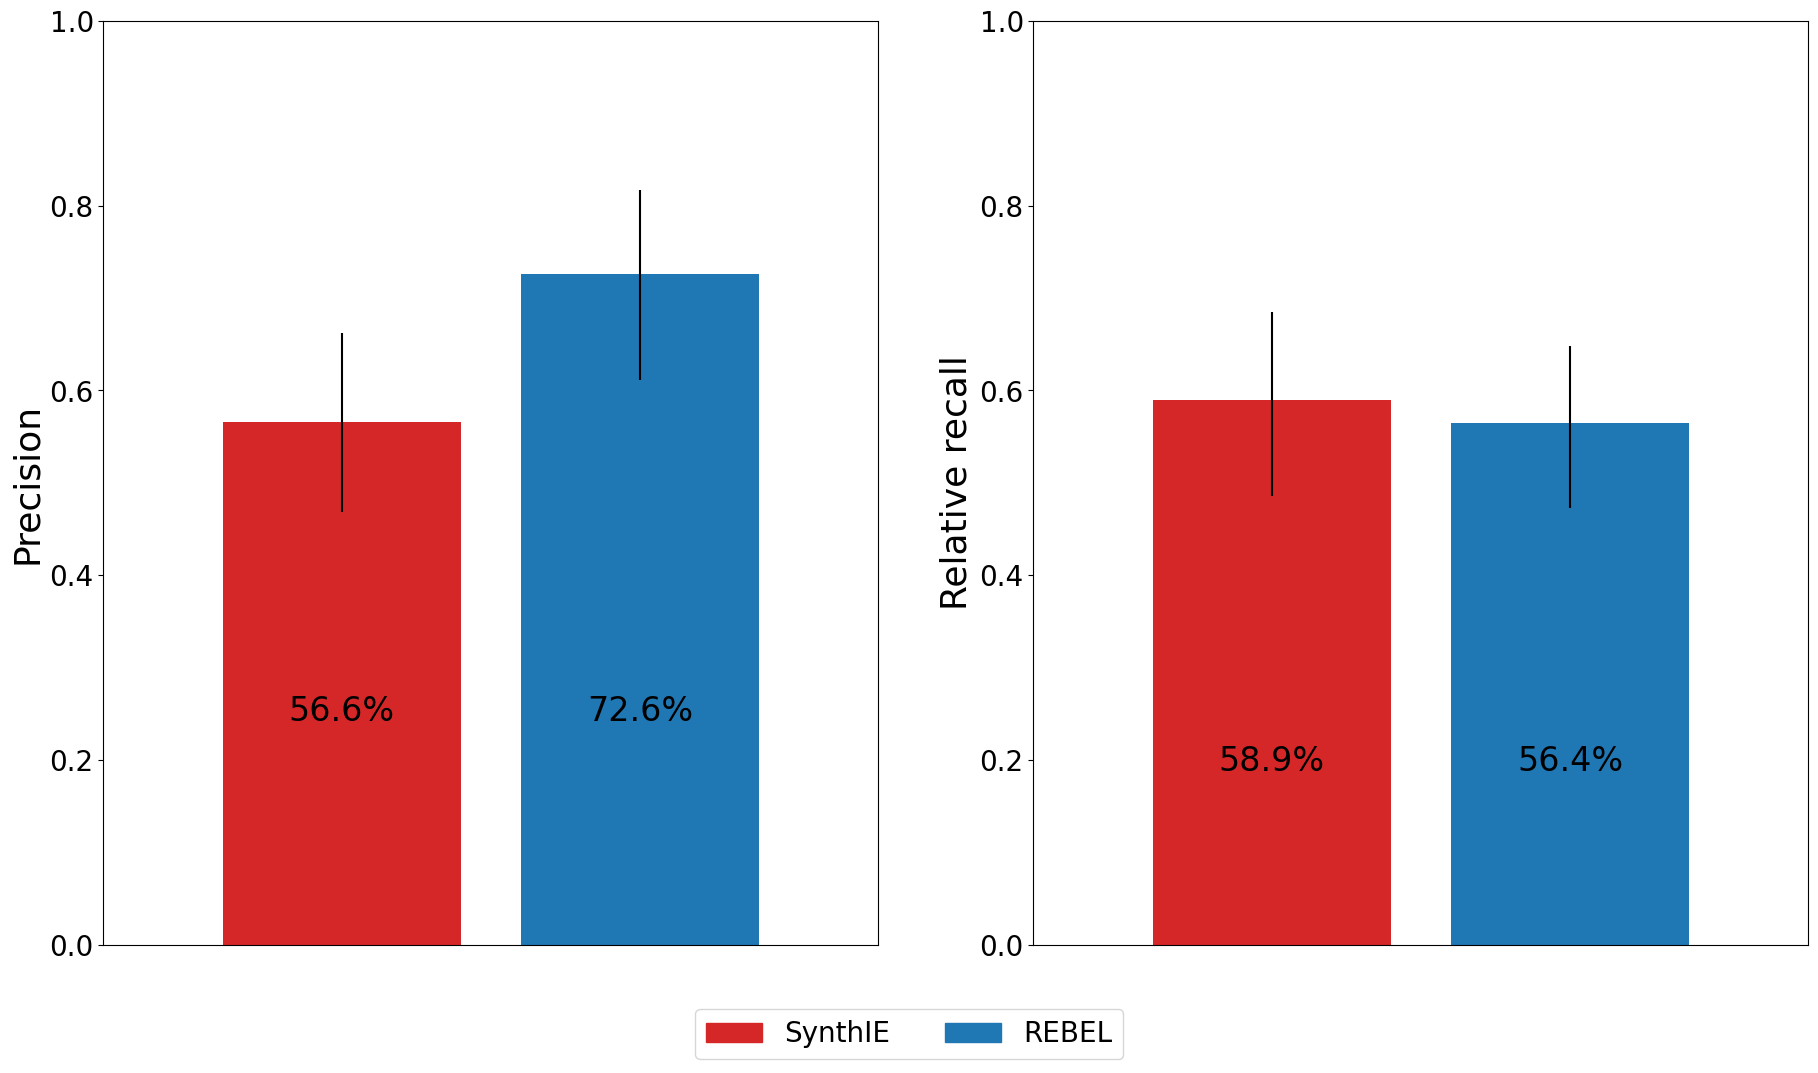

In [129]:
def bar_plot(ax, model_ex, rebel_ex, ci_model, ci_rebel):
    ci_model = np.abs(model_ex - np.array(ci_model))
    ci_rebel = np.abs(rebel_ex - np.array(ci_rebel))
    colors = [color_palette['model'], color_palette['rebel']]
    x = [0.1, 0.225]
    ys = [model_ex, rebel_ex]
    y_errs = np.array([ci_model, ci_rebel]).transpose()
    ax.bar(x, ys, yerr=y_errs, width=0.1, color=colors)

    for i in range(len(ys)):
        ax.text(x[i], ys[1]/3, f"{ys[i]*100:.1f}%", ha='center')

    ax.set_ylim((0, 1))
    ax.set_xlim((0, 0.325))
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    

fig, axes = plt.subplots(1, 2, figsize=(22,12))
bar_plot(axes[0], model_ex, rebel_ex, ci_model, ci_rebel)
axes[0].set_ylabel("Precision")

bar_plot(axes[1], model_rec, rebel_rec, model_rec_ci, rebel_rec_ci)
axes[1].set_ylabel("Relative recall")

patchlist = []
patchlist.append(mpatches.Patch(color=color_palette['model'], label="SynthIE"))
patchlist.append(mpatches.Patch(color=color_palette['rebel'], label="REBEL"))
fig.legend(handles=patchlist, fontsize='small', loc='lower center', ncol=3)

plt.savefig("human_eval_images/human_eval_task2_plot.pdf", bbox_inches="tight")


## Qualitative analysis of the annotations for Task 2 

In [40]:
%%html
<style>
.dataframe td {
    white-space: nowrap;
}
</style>

In [110]:
df = pd.read_csv("human_eval_data/mturk_task2_results.csv")
df

,Unnamed: 0,id,dataset,triplet_set,triplets_formatted,sentence,Result_ex,num_workers,first_worker,second_worker,third_worker
0,0,234,rebel,[s] Dwan_Hurt [r] sport [o] Basketball [e],(Dwan Hurt; sport; Basketball),"Dwan Hurt (March 29, 1963 – November 25, 2016)...",['0'],3,['0'],['0'],['0']
1,1,234,model,[s] Dwan_Hurt [r] position played on team / sp...,"(Dwan Hurt; position; Point guard), (Dwan Hurt...","Dwan Hurt (March 29, 1963 – November 25, 2016)...",['2'],3,['0'],['2'],['2']
2,2,689,rebel,[s] Kinnikinnick_Creek [r] located in the admi...,"(Kinnikinnick Creek; located; Ohio), (Scioto R...",Kinnikinnick Creek is a shallow waterway that ...,"['1', '0']",3,['1'],['0'],"['0', '1']"
3,3,689,model,[s] Kinnikinnick_Creek [r] mouth of the waterc...,"(Kinnikinnick Creek; mouth; Scioto River), (Ki...",Kinnikinnick Creek is a shallow waterway that ...,"['1', '2']",3,"['0', '1', '2']","['1', '2']","['1', '2']"
4,4,890,rebel,[s] Mount_Lanning [r] instance of [o] Mountain...,"(Mount Lanning; instance; Mountain), (Mount La...","Mount Lanning () is a mountain, high, located ...","['1', '3']",3,"['0', '1', '2', '3']","['1', '4']","['1', '3']"
...,...,...,...,...,...,...,...,...,...,...,...
97,115,38001,model,[s] Taoism [r] subclass of [o] Profession [e] ...,"(Taoism; subclass; Profession), (Taoism; parti...","Ma-Yi Theater Company is a professional, not-f...",[],3,['2'],['9'],[]
98,116,38596,rebel,[s] Mariana_Mantovana [r] instance of [o] Comu...,"(Mariana Mantovana; instance; Comune), (Marian...","Mariana Mantovana is a \""comune\"" (municipalit...","['0', '1', '2', '3', '5']",3,['0'],"['0', '1', '2', '3', '4', '5', '6']","['0', '1', '2', '3', '5']"
99,117,38596,model,[s] Mariana_Mantovana [r] located in the admin...,(Mariana Mantovana; located; Province of Mantu...,"Mariana Mantovana is a \""comune\"" (municipalit...",['0'],3,['0'],['0'],['0']
100,118,39176,rebel,[s] NGC_7041 [r] constellation [o] Indus_(cons...,(NGC 7041; constellation; Indus (constellation...,NGC 7041 is a lenticular galaxy located about ...,"['0', '1']",3,['0'],"['0', '1']","['0', '1']"


In [37]:
import ast
project_root_dir = "../"

import os
work_dir = os.path.abspath(project_root_dir)

import sys
sys.path.append(project_root_dir)


from src.utils import get_linearization_class

import pandas as pd
import numpy as np
from IPython.display import display, HTML

# from src.datamodules import IEGenericOutputDataset
# import wandb
# import re

# from functools import reduce


# from src.utils import evaluation_helpers

lc = get_linearization_class("fully_expanded")

def process_df(df):
    results_exs = []
    first_workers = []
    second_workers = []
    third_workers = []

    for triplet_set, result_ex, first_worker, second_worker, third_worker in zip(df.triplet_set, df.Result_ex, df.first_worker, df.second_worker, df.third_worker):
        triplets = lc.text_to_triplet_list(triplet_set, return_set=False)
        results_ex = [triplets[int(idx)] for idx in ast.literal_eval(result_ex)]
        first_worker = [triplets[int(idx)] for idx in ast.literal_eval(first_worker)]
        second_worker = [triplets[int(idx)] for idx in ast.literal_eval(second_worker)]
        third_worker = [triplets[int(idx)] for idx in ast.literal_eval(third_worker)]
        results_exs.append(lc.triplet_list_to_text(results_ex)[0])
        first_workers.append(lc.triplet_list_to_text(first_worker)[0])
        second_workers.append(lc.triplet_list_to_text(second_worker)[0])
        third_workers.append(lc.triplet_list_to_text(third_worker)[0])

    df["Result_ex"] = results_exs
    df["first_worker"] = first_workers
    df["second_worker"] = second_workers
    df["third_worker"] = third_workers


df = pd.read_csv("human_eval_data/mturk_task2_results.csv")
# df = df[df['Result_ex'] != '[]']
df = df.iloc[:, 1:]

# Process the rebel data
df_rebel_data = df[df.dataset == "rebel"]
df_rebel_data = df_rebel_data.drop(columns=["dataset"])
df_rebel_data = df_rebel_data.drop(columns=["triplets_formatted"])
process_df(df_rebel_data)
df_rebel_data.columns = ["id", "target", "input", "Result_ex", "num_workers", "first_worker", "second_worker", "third_worker"]

# process the predictions data
df_pred_data = df[df.dataset == "model"]
df_pred_data = df_pred_data.drop(columns=["dataset"])
df_pred_data = df_pred_data.drop(columns=["triplets_formatted"])
process_df(df_pred_data)
df_pred_data.columns = ["id", "prediction_SynthIE(large)-FE -- (genie_t5_tokenizeable) lp_0.8 [REBEL]", "input", "Result_ex", "num_workers", "first_worker", "second_worker", "third_worker"]

df_merged = pd.merge(df_rebel_data, df_pred_data, on=["id", "input", "num_workers"], how="inner", suffixes=("_target", "_prediction"))
gt_triplets = []
for res_tgt, res_pred in zip(df_merged['Result_ex_target'], df_merged['Result_ex_prediction']):
    tgt_triplets = lc.text_to_triplet_list(res_tgt)
    tgt_triplets = lc.text_to_triplet_list(res_pred)

    gt = set(tgt_triplets).union(set(tgt_triplets))
    gt_triplets.append(lc.triplet_list_to_text(gt)[0])
df_merged["gt"] = gt_triplets
df_merged = df_merged.drop(columns=["num_workers"])

def wrap_df_text_results(df, input_max_col, show_target=False, show_prediction=False):
    only_target_and_pred = not show_target and not show_prediction
    # print(only_target_and_pred)

    tdf = df.copy()
    tdf['input'] = tdf['input'].str.wrap(input_max_col)
    tdf['target'] = tdf['target'].str.replace("\[e\]|\[et\]", "[e]\\n", regex=True)
    tdf['prediction_SynthIE(large)-FE -- (genie_t5_tokenizeable) lp_0.8 [REBEL]'] = tdf['prediction_SynthIE(large)-FE -- (genie_t5_tokenizeable) lp_0.8 [REBEL]'].str.replace("\[e\]|\[et\]", "[e]\\n", regex=True)

    if only_target_and_pred:
        to_keep = ["target", "prediction_SynthIE(large)-FE -- (genie_t5_tokenizeable) lp_0.8 [REBEL]"]
    else:
        cols = ["Result_ex_target", "first_worker_target", "second_worker_target", "third_worker_target", "Result_ex_prediction", "first_worker_prediction", "second_worker_prediction", "third_worker_prediction"]
        
        for col in tdf.columns:
            if col in cols:
                if type(tdf[col][0]) == str:
                    tdf[col] = tdf[col].str.replace("\[e\]|\[et\]", "[e]\\n", regex=True)
                else:
                    tdf[col] = tdf[col].apply(lambda x: "\\n".join([re.sub("\[e\]|\[et\]", "[e]\\n", p) for p in x]))
        
        to_keep = []
        if show_target:
            for col in tdf.columns:
                if "target" in col:
                    to_keep.append(col)
        
        if show_prediction:
            for col in tdf.columns:
                if "prediction" in col:
                    to_keep.append(col)

    if "gt" in tdf.columns:
        tdf['gt'] = tdf['gt'].str.replace("\[e\]|\[et\]", "[e]\\n", regex=True)
        tdf = tdf[['id', 'input', "gt"] + to_keep]
    else:
        tdf = tdf[['id', 'input'] + to_keep]

    display(HTML(tdf.to_html().replace("\\n","<br>")))

In [38]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, "display.expand_frame_repr", False, 'display.max_colwidth', None, 'display.width', None): 
    wrap_df_text_results(df_merged, 70, show_target=False, show_prediction=False)

,id,input,gt,target,prediction_SynthIE(large)-FE -- (genie_t5_tokenizeable) lp_0.8 [REBEL]
0,234,"Dwan Hurt (March 29, 1963 – November 25, 2016) was an Americanbasketball coach and dean at Junipero Serra High School, was named2010 State Coach of the Year by Cal-Hi Sports; Daily Breeze Coach ofthe Year 2010; and coached his high school alma mater, the SerraCavaliers, to the 2010 California Interscholastic Federation DivisionIII Boys Basketball State Championship.",[s] Dwan_Hurt [r] country for sport [o] United_States [e],[s] Dwan_Hurt [r] sport [o] Basketball [e],[s] Dwan_Hurt [r] position played on team / speciality [o] Point_guard [e] [s] Dwan_Hurt [r] native language [o] English_language [e] [s] Dwan_Hurt [r] country for sport [o] United_States [e]
1,689,"Kinnikinnick Creek is a shallow waterway that is part of the SciotoRiver watershed, flowing through southern Pickaway and northern RossCounties in Ohio.","[s] Kinnikinnick_Creek [r] located in the administrative territorial entity [o] Pickaway_County,_Ohio [e] [s] Kinnikinnick_Creek [r] located in the administrative territorial entity [o] Ross_County,_Ohio [e]",[s] Kinnikinnick_Creek [r] located in the administrative territorial entity [o] Ohio [e] [s] Scioto_River [r] located in the administrative territorial entity [o] Ohio [e],"[s] Kinnikinnick_Creek [r] mouth of the watercourse [o] Scioto_River [e] [s] Kinnikinnick_Creek [r] located in the administrative territorial entity [o] Pickaway_County,_Ohio [e] [s] Kinnikinnick_Creek [r] located in the administrative territorial entity [o] Ross_County,_Ohio [e]"
2,890,"Mount Lanning () is a mountain, high, located at the south side ofNewcomer Glacier, southeast of Mount Warren, in the northern portionof the Sentinel Range, Ellsworth Mountains, Antarctica.",[s] Mount_Lanning [r] continent [o] Antarctica [e],[s] Mount_Lanning [r] instance of [o] Mountain [e] [s] Mount_Lanning [r] mountain range [o] Sentinel_Range [e] [s] Newcomer_Glacier [r] mountain range [o] Sentinel_Range [e] [s] Sentinel_Range [r] mountain range [o] Ellsworth_Mountains [e] [s] Ellsworth_Mountains [r] has part [o] Sentinel_Range [e],[s] Mount_Lanning [r] instance of [o] Mountain [e] [s] Mount_Lanning [r] continent [o] Antarctica [e] [s] Antarctica [r] lowest point [o] Bentley_Subglacial_Trench [e]
3,981,Bright Ideas is Portastatic\'s fifth studio album.,[s] Bright_Ideas [r] performer [o] Portastatic [e],[s] Bright_Ideas [r] performer [o] Portastatic [e],[s] Bright_Ideas [r] performer [o] Portastatic [e]
4,1699,Dark Scavenger is a point-and-click adventure role-playing game videogame published and developed by Canadian indie studio Psydra Games.,[s] Dark_Scavenger [r] instance of [o] Video_game [e] [s] Dark_Scavenger [r] country of origin [o] Canada [e] [s] Dark_Scavenger [r] genre [o] Adventure_game [e],[s] Dark_Scavenger [r] genre [o] Adventure_game [e] [s] Dark_Scavenger [r] genre [o] Role-playing_video_game [e],[s] Dark_Scavenger [r] genre [o] Adventure_game [e] [s] Dark_Scavenger [r] instance of [o] Video_game [e] [s] Dark_Scavenger [r] country of origin [o] Canada [e]
5,1742,"Iris Rezende Machado (born 22 December 1933) is a Brazilianpolitician, member of the Brazilian Democratic Movement (MDB).",[s] Iris_Rezende [r] country of citizenship [o] Brazil [e] [s] Iris_Rezende [r] instance of [o] Human [e] [s] Iris_Rezende [r] occupation [o] Politician [e] [s] Iris_Rezende [r] member of political party [o] Brazilian_Democratic_Movement [e],[s] Iris_Rezende [r] country of citizenship [o] Brazil [e] [s] Iris_Rezende [r] member of political party [o] Brazilian_Democratic_Movement [e],"[s] Iris_Rezende [r] country of citizenship [o] Brazil [e] [s] Iris_Rezende [r] occupation [o] Politician [e] [s] Iris_Rezende [r] member of political party [o] Brazilian_Democratic_Movement [e] [s] Iris_Rezende [r] languages spoken, written or signed [o] Portuguese_language [e] [s] Iris_Rezende [r] instance of [o] Human [e]"
6,2009,"Dennis Janke (born April 13, 1950 in Cleveland, Ohi

In [39]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, "display.expand_frame_repr", False, 'display.max_colwidth', None, 'display.width', None): 
    wrap_df_text_results(df_merged, 70, show_target=True, show_prediction=False)

,id,input,gt,target,Result_ex_target,first_worker_target,second_worker_target,third_worker_target
0,234,"Dwan Hurt (March 29, 1963 – November 25, 2016) was an Americanbasketball coach and dean at Junipero Serra High School, was named2010 State Coach of the Year by Cal-Hi Sports; Daily Breeze Coach ofthe Year 2010; and coached his high school alma mater, the SerraCavaliers, to the 2010 California Interscholastic Federation DivisionIII Boys Basketball State Championship.",[s] Dwan_Hurt [r] country for sport [o] United_States [e],[s] Dwan_Hurt [r] sport [o] Basketball [e],[s] Dwan_Hurt [r] sport [o] Basketball [e],[s] Dwan_Hurt [r] sport [o] Basketball [e],[s] Dwan_Hurt [r] sport [o] Basketball [e],[s] Dwan_Hurt [r] sport [o] Basketball [e]
1,689,"Kinnikinnick Creek is a shallow waterway that is part of the SciotoRiver watershed, flowing through southern Pickaway and northern RossCounties in Ohio.","[s] Kinnikinnick_Creek [r] located in the administrative territorial entity [o] Pickaway_County,_Ohio [e] [s] Kinnikinnick_Creek [r] located in the administrative territorial entity [o] Ross_County,_Ohio [e]",[s] Kinnikinnick_Creek [r] located in the administrative territorial entity [o] Ohio [e] [s] Scioto_River [r] located in the administrative territorial entity [o] Ohio [e],[s] Scioto_River [r] located in the administrative territorial entity [o] Ohio [e] [s] Kinnikinnick_Creek [r] located in the administrative territorial entity [o] Ohio [e],[s] Scioto_River [r] located in the administrative territorial entity [o] Ohio [e],[s] Kinnikinnick_Creek [r] located in the administrative territorial entity [o] Ohio [e],[s] Kinnikinnick_Creek [r] located in the administrative territorial entity [o] Ohio [e] [s] Scioto_River [r] located in the administrative territorial entity [o] Ohio [e]
2,890,"Mount Lanning () is a mountain, high, located at the south side ofNewcomer Glacier, southeast of Mount Warren, in the northern portionof the Sentinel Range, Ellsworth Mountains, Antarctica.",[s] Mount_Lanning [r] continent [o] Antarctica [e],[s] Mount_Lanning [r] instance of [o] Mountain [e] [s] Mount_Lanning [r] mountain range [o] Sentinel_Range [e] [s] Newcomer_Glacier [r] mountain range [o] Sentinel_Range [e] [s] Sentinel_Range [r] mountain range [o] Ellsworth_Mountains [e] [s] Ellsworth_Mountains [r] has part [o] Sentinel_Range [e],[s] Mount_Lanning [r] mountain range [o] Sentinel_Range [e] [s] Sentinel_Range [r] mountain range [o] Ellsworth_Mountains [e],[s] Mount_Lanning [r] instance of [o] Mountain [e] [s] Mount_Lanning [r] mountain range [o] Sentinel_Range [e] [s] Newcomer_Glacier [r] mountain range [o] Sentinel_Range [e] [s] Sentinel_Range [r] mountain range [o] Ellsworth_Mountains [e],[s] Mount_Lanning [r] mountain range [o] Sentinel_Range [e] [s] Ellsworth_Mountains [r] has part [o] Sentinel_Range [e],[s] Mount_Lanning [r] mountain range [o] Sentinel_Range [e] [s] Sentinel_Range [r] mountain range [o] Ellsworth_Mountains [e]
3,981,Bright Ideas is Portastatic\'s fifth studio album.,[s] Bright_Ideas [r] performer [o] Portastatic [e],[s] Bright_Ideas [r] performer [o] Portastatic [e],[s] Bright_Ideas [r] performer [o] Portastatic [e],[s] Bright_Ideas [r] performer [o] Portastatic [e],[s] Bright_Ideas [r] performer [o] Portastatic [e],[s] Bright_Ideas [r] performer [o] Portastatic [e]
4,1699,Dark Scavenger is a point-and-click adventure role-playing game videogame published and developed by Canadian indie studio Psydra Games.,[s] Dark_Scavenger [r] instance of [o] Video_game [e] [s] Dark_Scavenger [r] country of origin [o] Canada [e] [s] Dark_Scavenger [r] genre [o] Adventure_game [e],[s] Dark_Scavenger [r] genre [o] Adventure_game [e] [s] Dark_Scavenger [r] genre [o] Role-playing_video_game [e],[s] Dark_Scavenger [r] genre [o] Adventure_game [e] [s] Dark_Scavenger [r] genre [o] Role-playing_video_game [e],[s] Dark_Scavenger [r] genre [o] Adventure_game [e] [s] Dark_Scavenger [r] genre [o] Role-playing_video_game [e],[s] Dark_Scavenger [r] g

In [40]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, "display.expand_frame_repr", False, 'display.max_colwidth', None, 'display.width', None): 
    wrap_df_text_results(df_merged, 70, show_target=False, show_prediction=True)

,id,input,gt,prediction_SynthIE(large)-FE -- (genie_t5_tokenizeable) lp_0.8 [REBEL],Result_ex_prediction,first_worker_prediction,second_worker_prediction,third_worker_prediction
0,234,"Dwan Hurt (March 29, 1963 – November 25, 2016) was an Americanbasketball coach and dean at Junipero Serra High School, was named2010 State Coach of the Year by Cal-Hi Sports; Daily Breeze Coach ofthe Year 2010; and coached his high school alma mater, the SerraCavaliers, to the 2010 California Interscholastic Federation DivisionIII Boys Basketball State Championship.",[s] Dwan_Hurt [r] country for sport [o] United_States [e],[s] Dwan_Hurt [r] position played on team / speciality [o] Point_guard [e] [s] Dwan_Hurt [r] native language [o] English_language [e] [s] Dwan_Hurt [r] country for sport [o] United_States [e],[s] Dwan_Hurt [r] country for sport [o] United_States [e],[s] Dwan_Hurt [r] position played on team / speciality [o] Point_guard [e],[s] Dwan_Hurt [r] country for sport [o] United_States [e],[s] Dwan_Hurt [r] country for sport [o] United_States [e]
1,689,"Kinnikinnick Creek is a shallow waterway that is part of the SciotoRiver watershed, flowing through southern Pickaway and northern RossCounties in Ohio.","[s] Kinnikinnick_Creek [r] located in the administrative territorial entity [o] Pickaway_County,_Ohio [e] [s] Kinnikinnick_Creek [r] located in the administrative territorial entity [o] Ross_County,_Ohio [e]","[s] Kinnikinnick_Creek [r] mouth of the watercourse [o] Scioto_River [e] [s] Kinnikinnick_Creek [r] located in the administrative territorial entity [o] Pickaway_County,_Ohio [e] [s] Kinnikinnick_Creek [r] located in the administrative territorial entity [o] Ross_County,_Ohio [e]","[s] Kinnikinnick_Creek [r] located in the administrative territorial entity [o] Pickaway_County,_Ohio [e] [s] Kinnikinnick_Creek [r] located in the administrative territorial entity [o] Ross_County,_Ohio [e]","[s] Kinnikinnick_Creek [r] mouth of the watercourse [o] Scioto_River [e] [s] Kinnikinnick_Creek [r] located in the administrative territorial entity [o] Pickaway_County,_Ohio [e] [s] Kinnikinnick_Creek [r] located in the administrative territorial entity [o] Ross_County,_Ohio [e]","[s] Kinnikinnick_Creek [r] located in the administrative territorial entity [o] Pickaway_County,_Ohio [e] [s] Kinnikinnick_Creek [r] located in the administrative territorial entity [o] Ross_County,_Ohio [e]","[s] Kinnikinnick_Creek [r] located in the administrative territorial entity [o] Pickaway_County,_Ohio [e] [s] Kinnikinnick_Creek [r] located in the administrative territorial entity [o] Ross_County,_Ohio [e]"
2,890,"Mount Lanning () is a mountain, high, located at the south side ofNewcomer Glacier, southeast of Mount Warren, in the northern portionof the Sentinel Range, Ellsworth Mountains, Antarctica.",[s] Mount_Lanning [r] continent [o] Antarctica [e],[s] Mount_Lanning [r] instance of [o] Mountain [e] [s] Mount_Lanning [r] continent [o] Antarctica [e] [s] Antarctica [r] lowest point [o] Bentley_Subglacial_Trench [e],[s] Mount_Lanning [r] continent [o] Antarctica [e],[s] Mount_Lanning [r] instance of [o] Mountain [e] [s] Mount_Lanning [r] continent [o] Antarctica [e],[s] Mount_Lanning [r] continent [o] Antarctica [e],[s] Mount_Lanning [r] continent [o] Antarctica [e]
3,981,Bright Ideas is Portastatic\'s fifth studio album.,[s] Bright_Ideas [r] performer [o] Portastatic [e],[s] Bright_Ideas [r] performer [o] Portastatic [e],[s] Bright_Ideas [r] performer [o] Portastatic [e],[s] Bright_Ideas [r] performer [o] Portastatic [e],[s] Bright_Ideas [r] performer [o] Portastatic [e],[s] Bright_Ideas [r] performer [o] Portastatic [e]
4,1699,Dark Scavenger is a point-and-click adventure role-playing game videogame published and developed by Canadian indie studio Psydra Games.,[s] Dark_Scavenger [r] instance of [o] Video_game [e] [s] Dark_Scavenger [r] country of origin [o] Canada [e] [s] Dark_Scavenger [r] genre [o] Adventure_game [e],[s] Dark_Scavenger [r] genre [o] Adven